In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from 

In [ ]:
#loading the dataset
from keras.datasets.mnist import load_data
(trainX, trainY), (testX, testY) = load_data()
print('Train',trainX.shape, trainY.shape)
print('Train',testX.shape, testY.shape)

11501568/11490434 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Train (10000, 28, 28) (10000,)


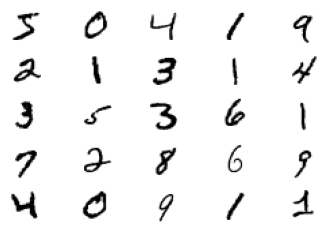

In [ ]:
#plotting some images just for display
for i in range(25):
	# define subplot
	plt.subplot(5, 5,1+i)
	# turn off axis
	plt.axis('off')
	# plot raw pixel data
  #using reverse gray scale map
	plt.imshow(trainX[i], cmap='gray_r')
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


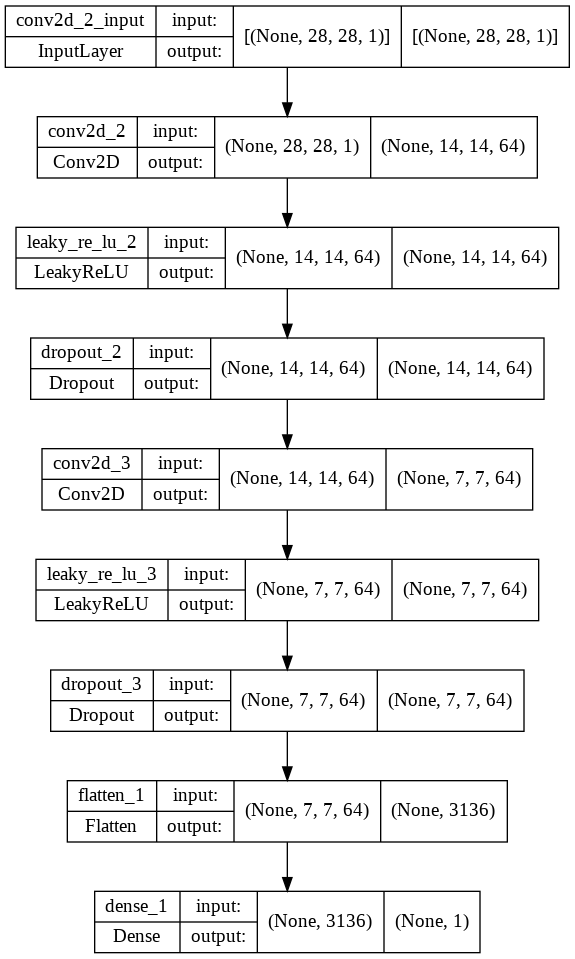

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, LeakyReLU
#defining the descriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
#define the model
model = define_discriminator()
#summarizing the model
model.summary()
#plotting the model
keras.utils.plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#The images are 2D arrays of pixels and convolutional neural networks expect 3D arrays of images as input, where each image has one or more channels.
#update the images to have an additional dimension for the grayscale channel.Can do this using the expand_dims() NumPy function and specify the final dimension for the channels-last image format.
# load and prepare mnist training images
def load_real_samples():
	# load mnist dataset
	(trainX, _), (_, _) = load_data()
	# expand to 3d, e.g. add channels dimension
	X = np.expand_dims(trainX, axis=-1)
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [0,1]
	X = X / 255.0
	return X

In [ ]:
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = np.random.randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = np.ones((n_samples, 1))
	return X, y
 
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
	# generate uniform random numbers in [0,1]
	X = np.random.rand(28 * 28 * n_samples)
	# reshape into a batch of grayscale images
	X = X.reshape((n_samples, 28, 28, 1))
	# generate 'fake' class labels (0)
	y = np.zeros((n_samples, 1))
	return X, y
 
# train the discriminator model
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_iter):
		# get randomly selected 'real' samples
		X_real, y_real = generate_real_samples(dataset, half_batch)
		# update discriminator on real samples
		_, real_acc = model.train_on_batch(X_real, y_real)
		# generate 'fake' examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update discriminator on fake samples
		_, fake_acc = model.train_on_batch(X_fake, y_fake)
		# summarize performance
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))
 #Running the example first defines the model, loads the MNIST dataset, then trains the discriminator model.
# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


>1 real=69% fake=16%
>2 real=76% fake=39%
>3 real=81% fake=53%
>4 real=72% fake=68%
>5 real=77% fake=88%
>6 real=80% fake=95%
>7 real=80% fake=98%
>8 real=74% fake=100%
>9 real=84% fake=99%
>10 real=81% fake=100%
>11 real=79% fake=100%
>12 real=84% fake=100%
>13 real=84% fake=100%
>14 real=80% fake=100%
>15 real=84% fake=100%
>16 real=84% fake=100%
>17 real=81% fake=100%
>18 real=81% fake=100%
>19 real=87% fake=100%
>20 real=83% fake=100%
>21 real=88% fake=100%
>22 real=90% fake=100%
>23 real=95% fake=100%
>24 real=90% fake=100%
>25 real=96% fake=100%
>26 real=93% fake=100%
>27 real=98% fake=100%
>28 real=98% fake=100%
>29 real=96% fake=100%
>30 real=99% fake=100%
>31 real=100% fake=100%
>32 real=95% fake=100%
>33 real=98% fake=100%
>34 real=100% fake=100%
>35 real=98% fake=100%
>36 real=98% fake=100%
>37 real=100% fake=100%
>38 real=100% fake=100%
>39 real=99% fake=100%
>40 real=100% fake=100%
>41 real=100% fake=100%
>42 real=100% fake=100%
>43 real=99% fake=100%
>44 real=100% fake=10

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 128)      262272    
 ranspose)                                                       
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 28, 28, 128)      262272    
 ranspose)                                           

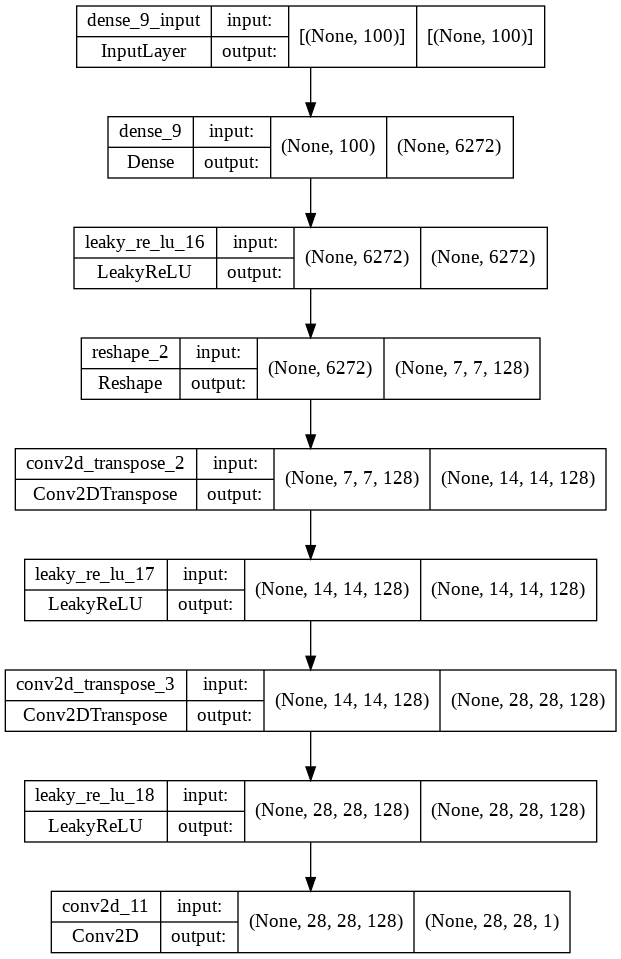

In [ ]:
#Generator Model Part
#The latent space is an arbitrarily defined vector space of Gaussian-distributed values, e.g. 100 dimensions.
# It has no meaning, but by drawing points from this space randomly and providing them to the generator model during training,
# the generator model will assign meaning to the latent points and, in turn, the latent space, until, at the end of training,
# the latent vector space represents a compressed representation of the output space, MNIST images, that only the generator knows how to turn into plausible MNIST images.

#Inputs: Point in latent space, e.g. a 100 element vector of Gaussian random numbers.
#Outputs: Two-dimensional square grayscale image of 28×28 pixels with pixel values in [0,1].
#Developing a generator model requires that we transform a vector from the latent space with, 100 dimensions to a 2D array with 28×28 or 784 values.

# define the generator model
from keras.layers import Conv2DTranspose
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(keras.layers.Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model
 
# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
keras.utils.plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

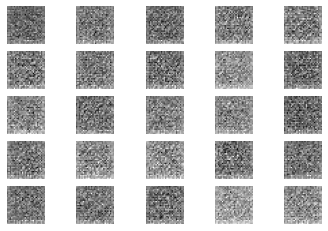

In [ ]:
#How to use generator to generate samples(it is just another model)
#step1:generate new points in the latent space by calling the randn() NumPy function for generating arrays of random numbers drawn from a standard Gaussian.
#The array of random numbers can then be reshaped into samples, that is n rows with 100 elements per row.

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = np.random.randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
#use the generated points as input to the generator model to generate new samples, then plot the samples.

# use the generator to generate n fake examples, with class labels
def generatee_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = np.zeros((n_samples, 1))
	return X, y

# size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# generate samples
n_samples = 25
X, _ = generatee_fake_samples(model, latent_dim, n_samples)
# plot the generated samples
for i in range(n_samples):
	# define subplot
	plt.subplot(5, 5, 1 + i)
	# turn off axis labels
	plt.axis('off')
	# plot single image
	plt.imshow(X[i, :, :, 0], cmap='gray_r')
# show the figure
plt.show()
#the model is not trained, the generated images are completely random pixel values in [0, 1].

In [ ]:
#Training of the generator model
#weights in the generator model are updated based on the performance of the discriminator model.
#When the discriminator is good at detecting fake samples, the generator is updated more,
#and when the discriminator model is relatively poor or confused when detecting fake samples, the generator model is updated less.

#simplest approach is to create a new model that combines the generator and discriminator models.
#a new GAN model can be defined that stacks the generator and discriminator such that the generator receives
#as input random points in the latent space and generates samples that are fed into the discriminator model directly,
#classified, and the output of this larger model can be used to update the model weights of the generator.

#Not a  new third model, just a new logical model that uses the already-defined layers and weights from the generator and discriminator models.

#Only the discriminator is concerned with distinguishing between real and fake examples, 
#therefore the discriminator model can be trained in a standalone manner on examples of each, as  did in the section on the discriminator model above.

#The generator model is only concerned with the discriminator’s performance on fake examples.
#Therefore, we will mark all of the layers in the discriminator as not trainable when it is part of the GAN model so that they can not be updated and overtrained on fake examples.

#When training the generator via this logical GAN model, there is one more important change. We want the discriminator to think that the samples output by the generator are real,
#not fake. Therefore, when the generator is trained as part of the GAN model, we will mark the generated samples as real (class 1).

#We can imagine that the discriminator will then classify the generated samples as not real (class 0) or a low probability of being real (0.3 or 0.5).
# The backpropagation process used to update the model weights will see this as a large error and will update the model weights (i.e. only the weights in the generator) 
#to correct for this error, in turn making the generator better at generating good fake samples.

#The define_gan() function below takes as arguments the already-defined generator and discriminator models and creates the new 
#logical third model subsuming these two models. The weights in the discriminator are marked as not trainable,
# which only affects the weights as seen by the GAN model and not the standalone discriminator model.

#The GAN model then uses the same binary cross entropy loss function as the discriminator and the efficient Adam version of 
#stochastic gradient descent with the learning rate of 0.0002 and momentum 0.5, recommended when training deep convolutional GANs.

#The trainable property impacts the model after it is compiled. The discriminator model was compiled with trainable layers, 
#therefore the model weights in those layers will be updated when the standalone model is updated via calls to the train_on_batch() function.

#The discriminator model was then marked as not trainable, added to the GAN model, 
#and compiled. In this model, the model weights of the discriminator model are not trainable and cannot be changed when the GAN model is updated via calls to the train_on_batch() function. 
#This change in the trainable property does not impact the training of standalone discriminator model

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_28 (Sequential)  (None, 28, 28, 1)         1164289   
                                                                 
 sequential_27 (Sequential)  (None, 1)                 40705     
                                                                 
Total params: 1,204,994
Trainable params: 1,164,289
Non-trainable params: 40,705
_________________________________________________________________


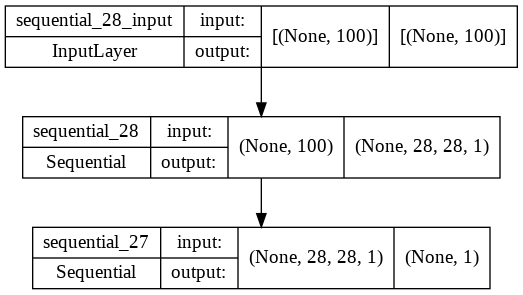

In [ ]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model
keras.utils.plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)
#Running the example first creates a summary of the composite model.
# model expects MNIST images as input and predict a single value as output.
#model expects a 100-element point in latent space as input and will predict a single output classification label.

In [ ]:
#Training the composite model involves generating a batch worth of points in the latent space via the generate_latent_points() function 
#in the previous section, and class=1 labels and calling the train_on_batch() function.
#only the generator will be updated each epoch, leaving the discriminator with default model weights.

# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=100, n_batch=256):
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)

In [ ]:
#we first update the discriminator model with real and fake samples, then update the generator via the composite model.
#This requires combining elements from the train_discriminator() function defined in the discriminator section above and the train_gan() function defined above.
# It also requires that we enumerate over both epochs and batches within in an epoch.
#he discriminator model is updated once per batch by combining one half a batch of fake and real examples into a single batch via the vstack() NumPy function.

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
  #In one epoch total of 60000 samples will be passed through the model, now the model will be updated after batch of 256 samples
  #so total number of updates or batch per epoch is 60000/256 = 234 approx.
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = np.ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))

In [ ]:
#Evaluation
#Generally, there are no objective ways to evaluate the performance of a GAN model.
#We cannot calculate this objective error score for generated images. 
#It might be possible in the case of MNIST images because the images are so well constrained, but in general, it is not possible (yet).
#Instead, images must be subjectively evaluated for quality by a human operator. 
#This means that we cannot know when to stop training without looking at examples of generated images.
# In turn, the adversarial nature of the training process means that the generator is changing after every batch, meaning that once “good enough” images can be generated,
# the subjective quality of the images may then begin to vary, improve, or even degrade with subsequent updates.

#There are three ways to handle this complex training situation.

#Periodically evaluate the classification accuracy of the discriminator on real and fake images.
#Periodically generate many images and save them to file for subjective review.
#Periodically save the generator model.


# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=1)
	# prepare fake examples
	x_fake, y_fake = generatee_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=1)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)
 
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=1, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generatee_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = np.ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
		# evaluate the model performance, sometimes
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)
 
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

>1, 1/234, d=0.696, g=0.702
>1, 2/234, d=0.688, g=0.723
>1, 3/234, d=0.680, g=0.749
>1, 4/234, d=0.678, g=0.769
>1, 5/234, d=0.662, g=0.788
>1, 6/234, d=0.658, g=0.809
>1, 7/234, d=0.649, g=0.828
>1, 8/234, d=0.646, g=0.839
>1, 9/234, d=0.635, g=0.849
>1, 10/234, d=0.636, g=0.848
>1, 11/234, d=0.633, g=0.839
>1, 12/234, d=0.639, g=0.818
>1, 13/234, d=0.639, g=0.795
>1, 14/234, d=0.645, g=0.767
>1, 15/234, d=0.643, g=0.747
>1, 16/234, d=0.644, g=0.732
>1, 17/234, d=0.640, g=0.719
>1, 18/234, d=0.632, g=0.711
>1, 19/234, d=0.623, g=0.707
>1, 20/234, d=0.615, g=0.703
>1, 21/234, d=0.611, g=0.702
>1, 22/234, d=0.601, g=0.701
>1, 23/234, d=0.583, g=0.701
>1, 24/234, d=0.583, g=0.701
>1, 25/234, d=0.572, g=0.701
>1, 26/234, d=0.566, g=0.702
>1, 27/234, d=0.546, g=0.702
>1, 28/234, d=0.540, g=0.703
>1, 29/234, d=0.526, g=0.703
>1, 30/234, d=0.518, g=0.704
>1, 31/234, d=0.507, g=0.705
>1, 32/234, d=0.495, g=0.706
>1, 33/234, d=0.485, g=0.707
>1, 34/234, d=0.477, g=0.707
>1, 35/234, d=0.473, g=